In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from scipy.stats import ttest_1samp

In [60]:
df=pd.read_csv("bitcoin.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day-MA,25-day-MA,Volatility_Index
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,1,1,2015,NaN,NaN,NaN,NaN
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,1,2,2015,0.002492,NaN,NaN,NaN
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,1,3,2015,-0.107767,NaN,NaN,NaN
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,1,4,2015,-0.060079,NaN,NaN,NaN
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,1,5,2015,0.038907,NaN,NaN,NaN


In [43]:
df.shape

(3652, 13)

In [61]:
df=df.dropna()

In [45]:
df.shape

(3622, 13)

In [46]:
df.tail()

,Date,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day-MA,25-day-MA,Volatility_Index
3647,2024-12-26,99297.695312,99884.570312,95137.882812,95795.515625,47054980873,12,26,2024,-0.035284,96934.662946,99160.407500,0.024803
3648,2024-12-27,95704.976562,97294.843750,93310.742188,94164.859375,52419934565,12,27,2024,-0.017022,96421.652902,99092.389688,0.023737
3649,2024-12-28,94160.187500,95525.898438,94014.289062,95163.929688,24107436185,12,28,2024,0.010610,96127.253348,99058.860312,0.023813
3650,2024-12-29,95174.054688,95174.875000,92881.789062,93530.226562,29635885267,12,29,2024,-0.017167,95902.294643,98849.328125,0.023742
3651,2024-12-30,93527.195312,94903.320312,91317.132812,92643.210938,56188003691,12,30,2024,-0.009484,95610.433036,98691.313750,0.023730


In [63]:
df.corr(numeric_only=True)

,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day-MA,25-day-MA,Volatility_Index
Open,1.000000,0.999565,0.999351,0.999062,0.660669,0.057026,0.006723,0.810329,-0.026742,0.998962,0.993341,-0.049269
High,0.999565,1.000000,0.999212,0.999607,0.666810,0.055623,0.006467,0.809002,-0.011129,0.998750,0.993067,-0.044414
Low,0.999351,0.999212,1.000000,0.999508,0.650981,0.059550,0.007164,0.812285,-0.009893,0.998318,0.992496,-0.055822
Close,0.999062,0.999607,0.999508,1.000000,0.660039,0.057136,0.006311,0.810382,0.002733,0.998301,0.992429,-0.049254
Volume,0.660669,0.666810,0.650981,0.660039,1.000000,-0.025605,-0.006975,0.629794,-0.008845,0.660629,0.650647,0.126880
Month,0.057026,0.055623,0.059550,0.057136,-0.025605,1.000000,0.009295,-0.022103,0.008166,0.056409,0.053048,-0.170628
Day,0.006723,0.006467,0.007164,0.006311,-0.006975,0.009295,1.000000,-0.000877,-0.005435,0.007663,0.010321,-0.007379
Year,0.810329,0.809002,0.812285,0.810382,0.629794,-0.022103,-0.000877,1.000000,-0.016699,0.811295,0.814766,-0.111904
Daily_Return,-0.026742,-0.011129,-0.009893,0.002733,-0.008845,0.008166,-0.005435,-0.016699,1.000000,-0.022674,-0.026886,0.011380
7-day-MA,0.998962,0.998750,0.998318,0.998301,0.660629,0.056409,0.007663,0.811295,-0.022674,1.000000,0.995779,-0.048978


In [64]:
X=df.drop(['Close','Date','Day','Month','Year','Daily_Return','25-day-MA','Volatility_Index'],axis=1)
y=df['Close']

In [65]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
model.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

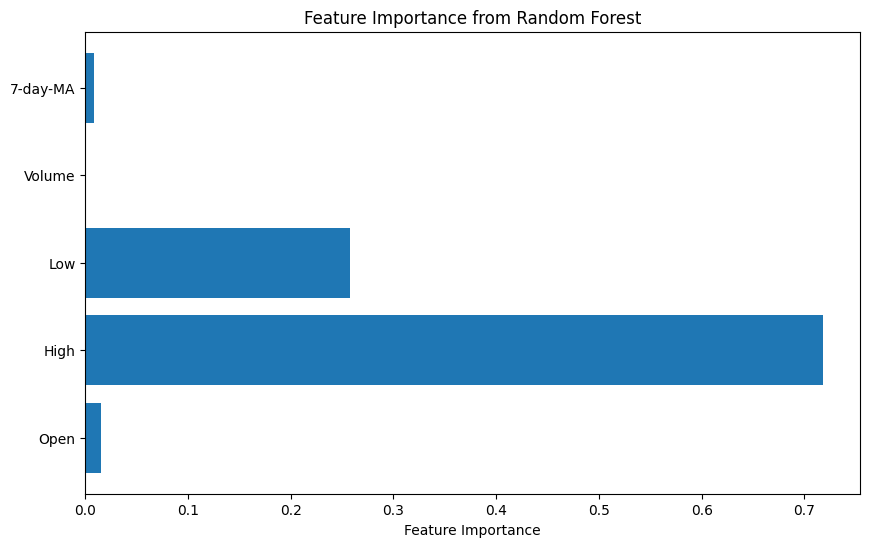

In [68]:
# Get feature importance
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [69]:
# Predictions for training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"\nEvaluation Metrics for {dataset_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.4f}")

# Evaluate model on training data
evaluate_model(y_train, y_train_pred, dataset_name="Training Data")

# Evaluate model on testing data
evaluate_model(y_test, y_test_pred, dataset_name="Testing Data")

# Check for Overfitting
if mean_absolute_error(y_train, y_train_pred) < mean_absolute_error(y_test, y_test_pred):
    print("\n Warning: Potential Overfitting! The model performs better on training data than testing data.")
else:
    print("\n The model generalizes well with comparable training and testing performance.")


Evaluation Metrics for Training Data:
Mean Absolute Error (MAE): 97.06
Mean Squared Error (MSE): 37713.98
Root Mean Squared Error (RMSE): 194.20
Mean Absolute Percentage Error (MAPE): 0.50%
R-squared (R²): 0.9999

Evaluation Metrics for Testing Data:
Mean Absolute Error (MAE): 255.43
Mean Squared Error (MSE): 325321.06
Root Mean Squared Error (RMSE): 570.37
Mean Absolute Percentage Error (MAPE): 1.25%
R-squared (R²): 0.9994



In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Grid search with cross-validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=0, n_jobs=-1), 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_absolute_error', 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Initialize Random Forest with pruning
rf_model = RandomForestRegressor(
    n_estimators=200, 
    max_depth=20,                 
    min_samples_split=2,          
    min_samples_leaf=2, 
    random_state=0, 
    n_jobs=-1
)

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=0)

mae_scores_train = -cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
mse_scores_train = -cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
r2_scores_train = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='r2')

# Fit model on full training data and evaluate on test set
rf_model.fit(X_train, y_train)
y_pred_test = rf_model.predict(X_test)


In [71]:

# Calculate Testing Performance
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Print Training Performance (CV Mean ± Std)
print(f"Training Performance (5-Fold CV):")
print(f"MAE: {mae_scores_train.mean():.2f} ± {mae_scores_train.std():.2f}")
print(f"MSE: {mse_scores_train.mean():.2f} ± {mse_scores_train.std():.2f}")
print(f"RMSE: {np.sqrt(mse_scores_train).mean():.2f} ± {np.sqrt(mse_scores_train).std():.2f}")
print(f"R²: {r2_scores_train.mean():.4f} ± {r2_scores_train.std():.4f}")

# Print Testing Performance
print("\nTesting Performance:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.4f}")

# Check for Overfitting
if mae_scores_train.mean() < mae_test and mse_scores_train.mean() < mse_test:
    print("\nWarning: Potential Overfitting detected! Training performance is much better than testing performance.")
else:
    print("\nThe model seems to generalize well with comparable training and testing performance.")


Training Performance (5-Fold CV):
MAE: 267.18 ± 20.80
MSE: 278255.55 ± 44094.07
RMSE: 525.75 ± 42.97
R²: 0.9994 ± 0.0001

Testing Performance:
MAE: 259.88
MSE: 360360.90
RMSE: 600.30
R²: 0.9993

The model seems to generalize well with comparable training and testing performance.


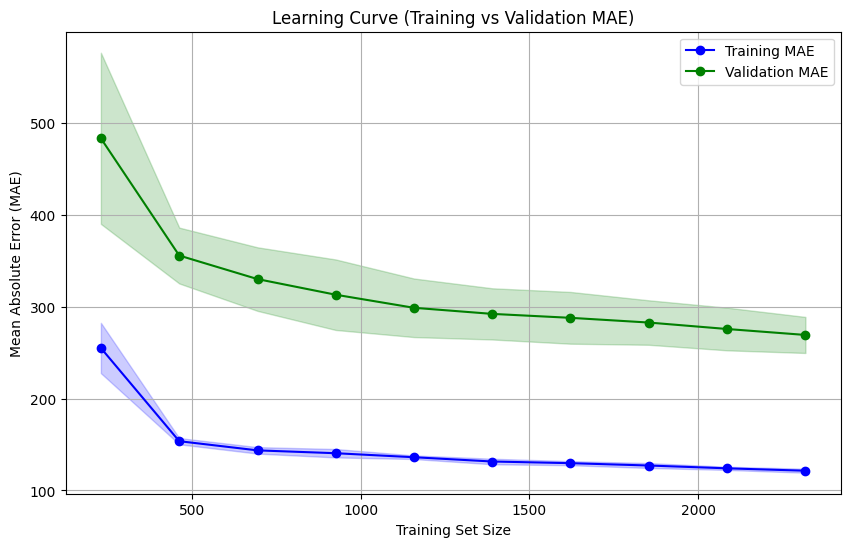

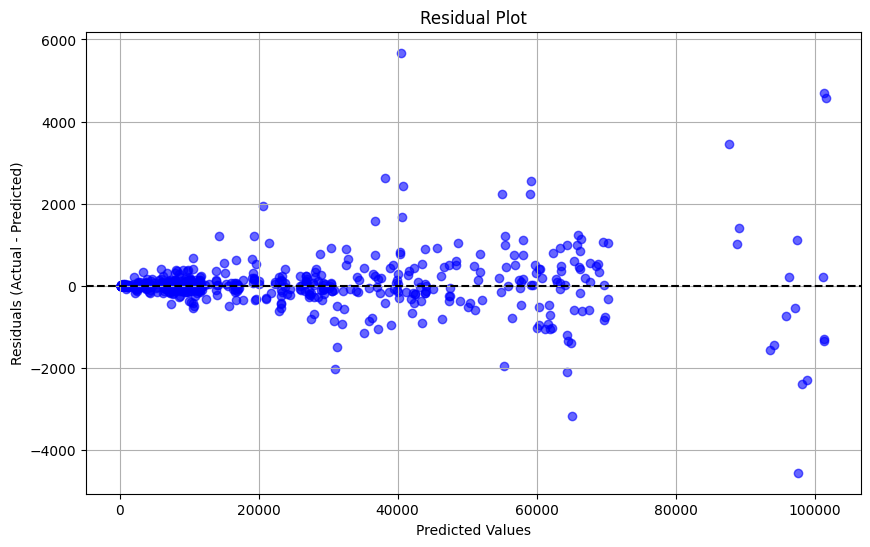

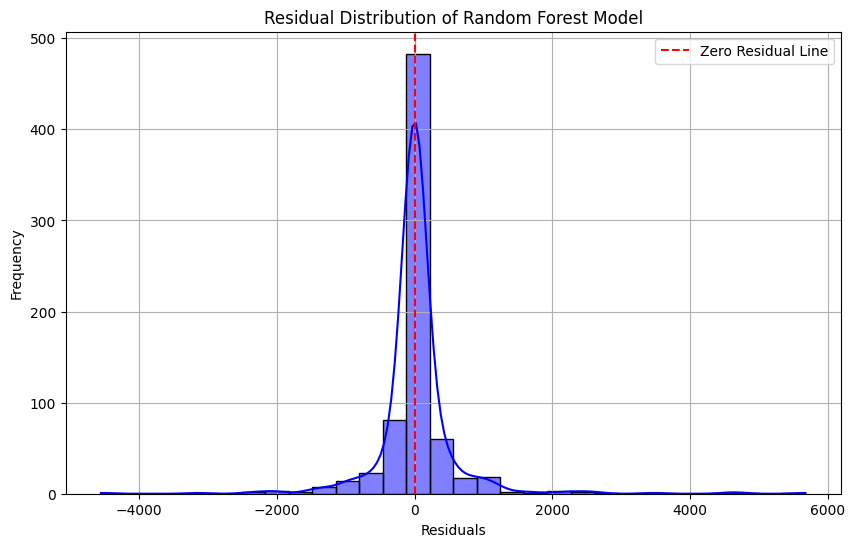

In [19]:

# 1. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training MAE", color="blue", marker="o")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Validation MAE", color="green", marker="o")
plt.fill_between(train_sizes, -train_scores.mean(axis=1) - train_scores.std(axis=1), 
                 -train_scores.mean(axis=1) + train_scores.std(axis=1), color="blue", alpha=0.2)
plt.fill_between(train_sizes, -test_scores.mean(axis=1) - test_scores.std(axis=1), 
                 -test_scores.mean(axis=1) + test_scores.std(axis=1), color="green", alpha=0.2)
plt.title("Learning Curve (Training vs Validation MAE)")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

# 3. Residual Histogram (Distribution of Residuals)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title("Residual Distribution of Random Forest Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

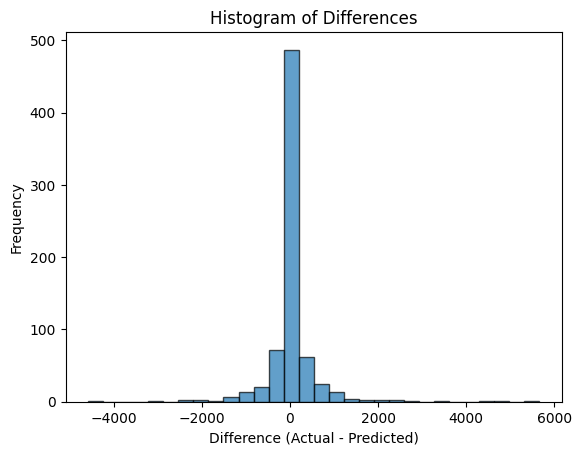

Shapiro-Wilk Test Statistic: 0.6235294451724247
P-value: 5.566514026524096e-37
Anderson-Darling Test Statistic: 84.27238728513771
Critical Values: [0.573 0.652 0.783 0.913 1.086]
Significance Level: [15.  10.   5.   2.5  1. ]
Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed).
Anderson-Darling Test: Reject the null hypothesis (data is not normally distributed).


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate the difference between predicted and actual values
difference = y_test - y_pred_test.flatten()


# Histogram
plt.hist(difference, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Differences")
plt.xlabel("Difference (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()



# Step 2: Perform normality tests
# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(difference)
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p}")

# Anderson-Darling test
ad_stat, ad_critical_values, ad_significance_level = stats.anderson(difference, dist='norm')
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print(f"Critical Values: {ad_critical_values}")
print(f"Significance Level: {ad_significance_level}")

# Step 3: Interpretation of normality tests
if shapiro_p < 0.05:
    print("Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed).")
else:
    print("Shapiro-Wilk Test: Fail to reject the null hypothesis (data is normally distributed).")

# Anderson-Darling Test Interpretation
if ad_stat > ad_critical_values[2]:  # 5% significance level
    print("Anderson-Darling Test: Reject the null hypothesis (data is not normally distributed).")
else:
    print("Anderson-Darling Test: Fail to reject the null hypothesis (data is normally distributed).")


In [73]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(difference)

print(f"Wilcoxon Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between predicted and actual values.")
else:
    print("Fail to reject the null hypothesis: No significant difference between predicted and actual values.")


Wilcoxon Test Statistic: 122957.0
P-value: 0.12603493115412667
Fail to reject the null hypothesis: No significant difference between predicted and actual values.


In [74]:
import pickle
pickle.dump(model, open('pickle.pkl','wb'))
model = pickle.load(open('pickle.pkl','rb'))

## LSTM

In [171]:

df.head(2)

,Date,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day MA,25-day MA,30-day Volatility
30,2015-01-31,226.440994,233.503998,216.309006,217.464005,23348200,1,31,2015,-0.039576,243.140429,239.081519,0.074958
31,2015-02-01,216.867004,231.574005,212.014999,226.972000,29128500,2,1,2015,0.043722,239.319571,236.386918,0.075558


In [172]:
df.dropna(inplace=True)

#features = ["Open", "High",	"Low", "Close", "Volume", "Month", "Day", "Year", "Daily_Return", "7-day MA", "25-day MA", "30-day Volatility"]
#features = ["Open",	"High",	"Low", "Close", "Volume", "Month", "Day", "Year", "7-day MA", "25-day MA"]
features = [ "High", "Low", "Close", "Volume", "Month", "7-day MA"]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + ['Close']])

In [173]:

# Create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, :-1])
        y.append(data[i, -1])
    return np.array(X), np.array(y)

lookback = 10
X, y = create_sequences(scaled_data, lookback)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/home/asif/Projects/Bitcoin/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 10, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model with Early Stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=32, callbacks=[early_stop])


Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0661e-04 - val_loss: 0.0013
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0765e-04 - val_loss: 9.7627e-04
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8625e-04 - val_loss: 0.0020
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9001e-04 - val_loss: 0.0014
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4580e-04 - val_loss: 0.0013
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3988e-04 - val_loss: 0.0014
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.4793e-04 - val_loss: 7.6158e-04
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8484e-04 - val_loss: 6.1665e-04
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3037e-04 - val_loss: 0.0018
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8399e-04 - val_loss: 0.0017
Epoch 12/5

In [175]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training Metrics
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Testing Metrics
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print Results
print("Training Data:")
print(f"R² Score: {r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")

print("\nTesting Data:")
print(f"R² Score: {r2_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Training Data:
R² Score: 0.9966
Mean Squared Error (MSE): 0.0001
Mean Absolute Error (MAE): 0.0049
Root Mean Squared Error (RMSE): 0.0089

Testing Data:
R² Score: 0.9947
Mean Squared Error (MSE): 0.0002
Mean Absolute Error (MAE): 0.0099
Root Mean Squared Error (RMSE): 0.0148


Shape of y_test: (723,)
Shape of y_pred_test: (723,)


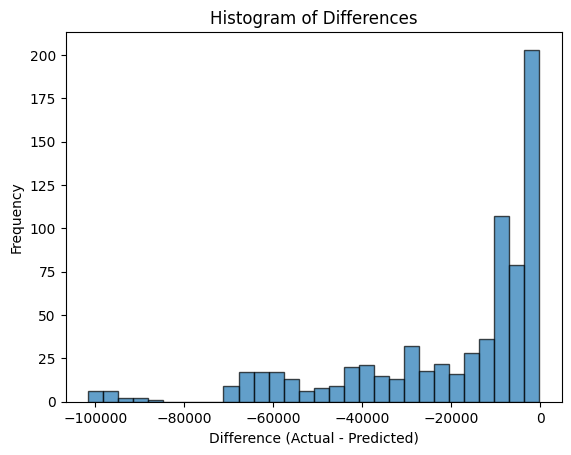

Shapiro-Wilk Test Statistic: 0.8086142263182898
P-value: 2.136879248216132e-28
Anderson-Darling Test Statistic: 47.92253037056389
Critical Values: [0.573 0.652 0.783 0.913 1.086]
Significance Level: [15.  10.   5.   2.5  1. ]
Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed).
Anderson-Darling Test: Reject the null hypothesis (data is not normally distributed).


In [178]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats




# If your shapes are mismatched, let's align them.
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_test:", y_pred_test.shape)

# Trimming or reshaping y_pred_test if needed to match y_test's length
if y_pred_test.shape[0] > y_test.shape[0]:
    y_pred_test = y_pred_test[:y_test.shape[0]]
elif y_pred_test.shape[0] < y_test.shape[0]:
    y_test = y_test[:y_pred_test.shape[0]]

# Now calculate the difference between predicted and actual values
difference = y_test - y_pred_test.flatten()

# Histogram
plt.hist(difference, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Differences")
plt.xlabel("Difference (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()



# Step 2: Perform normality tests
# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(difference)
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p}")

# Anderson-Darling test
ad_stat, ad_critical_values, ad_significance_level = stats.anderson(difference, dist='norm')
print(f"Anderson-Darling Test Statistic: {ad_stat}")
print(f"Critical Values: {ad_critical_values}")
print(f"Significance Level: {ad_significance_level}")

# Step 3: Interpretation of normality tests
if shapiro_p < 0.05:
    print("Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed).")
else:
    print("Shapiro-Wilk Test: Fail to reject the null hypothesis (data is normally distributed).")

# Anderson-Darling Test Interpretation
if ad_stat > ad_critical_values[2]:  # 5% significance level
    print("Anderson-Darling Test: Reject the null hypothesis (data is not normally distributed).")
else:
    print("Anderson-Darling Test: Fail to reject the null hypothesis (data is normally distributed).")


In [179]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(difference)

print(f"Wilcoxon Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between predicted and actual values.")
else:
    print("Fail to reject the null hypothesis: No significant difference between predicted and actual values.")


Wilcoxon Test Statistic: 0.0
P-value: 5.0632365200898885e-120
Reject the null hypothesis: Significant difference between predicted and actual values.


# Sarima

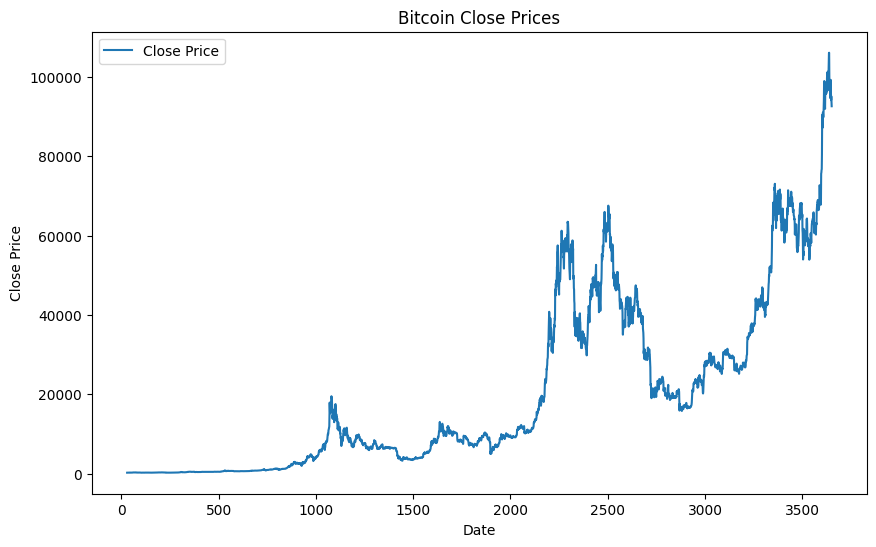

/home/asif/Projects/Bitcoin/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/asif/Projects/Bitcoin/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/asif/Projects/Bitcoin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2897
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -23332.482
Date:                            Thu, 06 Feb 2025   AIC                          46674.965
Time:                                    17:28:39   BIC                          46704.775
Sample:                                         0   HQIC                         46685.712
                                           - 2897                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2326      0.424     -0.548      0.584      -1.064       0.599
ma.L1          0.2109      0.427   

/home/asif/Projects/Bitcoin/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/asif/Projects/Bitcoin/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


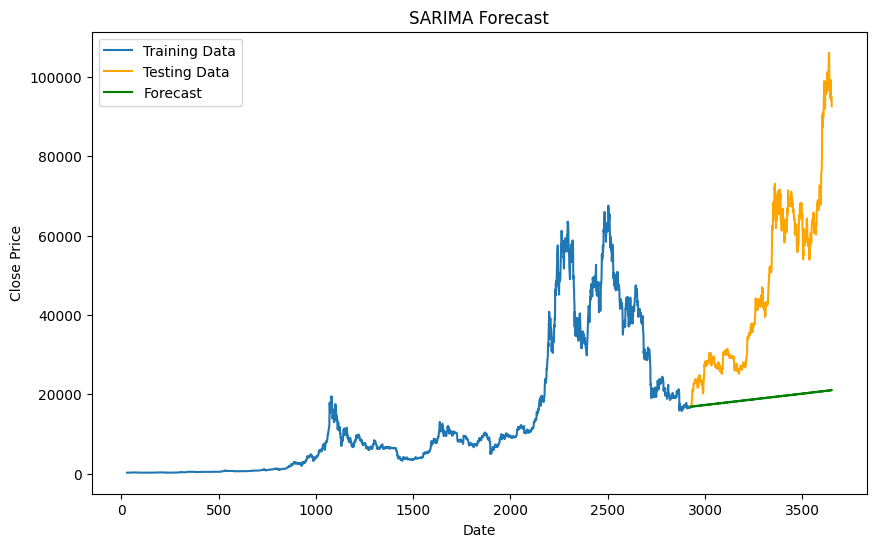

Mean Squared Error: 1237536628.943135


In [55]:

from statsmodels.tsa.statespace.sarimax import SARIMAX




# Use the 'Close' column as the target variable
time_series = df['Close']

# Plot the data to visualize the trend and seasonality
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Close Price')
plt.title('Bitcoin Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Split data into training and testing sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit a SARIMA model (Adjust parameters (p, d, q)(P, D, Q, s) as needed)
model = SARIMAX(train, 
                order=(1, 1, 1),  # p, d, q
                seasonal_order=(1, 1, 1, 12),  # P, D, Q, s
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_model = model.fit(disp=False)

# Print the model summary
print(sarima_model.summary())

# Forecast future values
forecast_steps = len(test)
forecast = sarima_model.forecast(steps=forecast_steps)

# Plot the training, testing, and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate the model performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')


In [56]:

# Compute R-squared
r2 = r2_score(test, forecast)
print(f'R-squared: {r2}')


R-squared: -1.6693438099293818


In [57]:
mape = mean_absolute_percentage_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'MAPE: {mape}, RMSE: {rmse}')


MAPE: 0.5248567809444785, RMSE: 35178.63881595101
